<a href="https://colab.research.google.com/github/sarasame00/laboElectro/blob/main/catodics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import funclab as fl

##Desviació electrostàtica

In [3]:
#Valors extrets de les imatges utilitzant PlotDigitizer

xE1 = np.array([0.9855072463768116, 1.4782608695652173, 1.9855072463768115, 2.5362318840579707, 3, 3.4927536231884058, 4.0144927536231885, 4.521739130434783, 5, 5.507246376811595, 5.9855072463768115, 6.478260869565218, 6.956521739130435, 7.434782608695652, 7.91304347826087, 8.376811594202898, 8.840579710144928])
yE1 = np.array([-0.08955223880597019, -0.05970149253731338, -0.05970149253731338, -0.014925373134328401, 0, 0.04477611940298509, 0.10447761194029848, 0.16417910447761197, 0.19402985074626866, 0.26865671641791045, 0.3731343283582089, 0.4328358208955224, 0.5223880597014925, 0.6119402985074627, 0.7164179104477613, 0.8208955223880597, 0.8955223880597015])

xE2 = np.array([1, 1.457142857142857, 2, 2.5142857142857142, 3.0285714285714285, 3.557142857142857, 4.0285714285714285, 4.514285714285714, 5.014285714285714, 5.557142857142857, 6.0285714285714285, 6.557142857142857, 7.042857142857143, 7.571428571428571, 8, 8.485714285714286])
yE2 = np.array([-0.13043478260869557, -0.08695652173913038, -0.02898550724637672, 0.05797101449275366, 0.14492753623188404, 0.30434782608695654, 0.4347826086956522, 0.6376811594202898, 0.8405797101449275, 1.1304347826086956, 1.3623188405797102, 1.6666666666666665, 1.9420289855072463, 2.246376811594203, 2.5072463768115942, 2.8115942028985508])

xE3 = np.array([1, 1.5217391304347827, 2.0144927536231885, 2.5362318840579707, 3.028985507246377, 3.579710144927536, 4.057971014492754, 4.594202898550725, 5.028985507246377, 5.550724637681159, 6.072463768115942])
yE3 = np.array([-0.08695652173913038, -0.02898550724637672, 0.04347826086956519, 0.2028985507246377, 0.37681159420289856, 0.5942028985507246, 0.855072463768116, 1.2753623188405796, 1.63768115942029, 2.0724637681159424, 2.579710144927536])

xE4 = np.array([0.9850746268656716, 1.5074626865671643, 2, 2.5373134328358207, 3.029850746268657, 3.5970149253731343, 4.074626865671641, 4.567164179104477, 5.08955223880597])
yE4 = np.array([-0.05797101449275366, 0.04347826086956519, 0.1594202898550725, 0.34782608695652173, 0.6086956521739131, 0.9710144927536232, 1.391304347826087, 1.9420289855072463, 2.5652173913043477])

xE5 = np.array([1, 1.5, 2, 2.5, 3.0294117647058822, 3.588235294117647, 4.0588235294117645, 4.5588235294117645, 5.073529411764706])
yE5 = np.array([-0.014084507042253502, 0.05633802816901401, 0.18309859154929575, 0.3661971830985915, 0.647887323943662, 1.056338028169014, 1.5774647887323945, 2.126760563380282, 2.9859154929577465])



In [4]:
Vp = [1000, 2000, 3000, 4000] #valors de potencial entre plaques (V)
d = 0.054 #distancia entre plaques (m)
Va = 4000 #potencial d'acceleracio (V)

V_p =1000, k =1.122525571393616
[array([ 1.29921941e+00, -1.06938364e-03]), array([1.24069841e-02, 4.84371660e-05]), 0.9986339549201027]
V_p =2000, k =1.8382064395698863
[array([ 4.25510750e+00, -2.07188738e-03]), array([0.03579805, 0.00012897]), 0.9990100905356064]
V_p =3000, k =2.1624964235337547
[array([ 7.50866814e+00, -2.69870712e-03]), array([0.19322574, 0.00036745]), 0.9940753060513752]
V_p =4000, k =2.262418009526262
[array([ 1.04741575e+01, -2.68402344e-03]), array([0.3850637 , 0.00052875]), 0.9906279289524672]


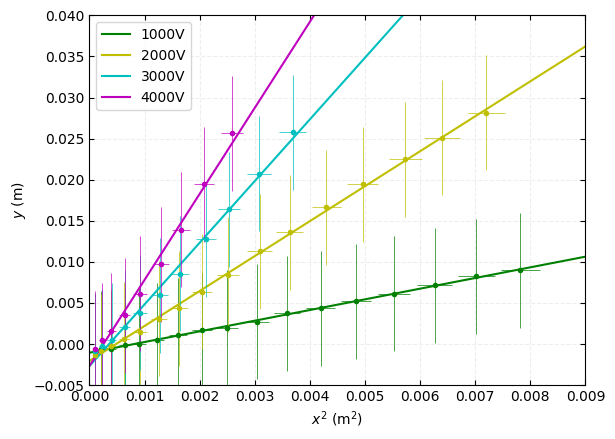

In [6]:
lista = [[xE1,yE1,1000],[xE2,yE2,2000],[xE3,yE3,3000],[xE4,yE4,4000]]

u = np.arange(0, 0.1, 0.001)

fig = plt.figure()
ax= fig.add_subplot()
ax.tick_params(direction='in', right=True, top=True)
ax.grid(color='#eeeeee', linestyle='--') #color y estilo de la cuadricula
colors= ['g','y','c','m','b','k','r','k']
num = 0

for v in lista:

  color = colors[num]

  def func(x, A, B):
    return A *x +B

  curve = fl.curveFit(func, (v[0]/100)*(v[0]/100), v[1]/100, graf=True)

  ax.errorbar((v[0]/100)*(v[0]/100),
                v[1]/100,
                xerr = 2*0.002*v[0]/100,
                yerr = 0.007,
                capsize = 0,
                elinewidth = 0.5,
                linewidth = 0,
                marker = 'o',
                markersize = 3,
                markerfacecolor = color,
                markeredgecolor = color,
                ecolor = color,
                )

  k = (4*d*curve[0][0]*Va)/(v[2])

  print('V_p =' + str(v[2]) +', k =' + str(k))

  plt.plot(u, func(u,curve[0][0], curve[0][1]), label = str(v[2])+'V', c=color)

  num +=1
  print(curve)

plt.xlabel('$x^2$ (m$^2$)')
plt.ylabel('$y$ (m)')
plt.xlim(0,0.009)
plt.ylim(-0.005,0.04)
plt.legend()

##Magnetostàtica

In [ ]:
x2kV = np.array([1.0185182568791784, 0.537036513758357, 1.472221908255014, 1.9814817431208214, 2.4722233211074505, 2.9722240275336684, 3.462965605520297, 3.9444473486411185, 4.398151706443173, 4.888892578003583, 5.388893284429801, 5.87037573397684, 6.333339220218483, 6.842599055084291, 7.287043578020537, 7.740747935822591])
y2kV = np.array([-0.19266038349951178, -0.13761465963455904, -0.24770610736446452, -0.33027504313407086, -0.4403668408361535, -0.541284117912626, -0.6880732981727953, -0.7706418839702244, -0.9174310642303938, -1.0917427564508622, -1.3027518312294173, -1.4954125647011063, -1.7064219894518386, -1.9724764381231692, -2.220183245431988, -2.4862383940476733])

x3kV = np.array([1.02803763640201, 0.4953282489775197, 1.5233644593261042, 2.009344928098386, 2.5140173921475792, 3.0280354973218717, 3.467287760468658, 3.971960224517851, 4.485978329692143, 4.953267516214227, 5.457939267236708, 5.953266090160802, 6.392517640280875, 6.934573381857178, 7.401862568379261])
y3kV = np.array([-0.2222223792056599, -0.16666660779787756, -0.34259268743675286, -0.4074075774727982, -0.5185184138628934, -0.6296296034657234, -0.7407414994940228, -0.8981482822381679, -1.0740740086643084, -1.2592592069314468, -1.4629629956678458, -1.6759262562452428, -1.879629691768907, -2.2222227324183947, -2.481481586137107])

x4kV =np.array( [1.0144927536231885, 1.5362318840579712, 2, 2.5072463768115942, 3.0144927536231885, 3.463768115942029, 4.0144927536231885, 4.55072463768116, 5, 5.507246376811595, 5.9855072463768115, 6.449275362318841, 6.826086956521739])
y4kV = np.array([-0.3623188405797102, -0.4492753623188406, -0.536231884057971, -0.6666666666666667, -0.8115942028985508, -0.9420289855072463, -1.1304347826086958, -1.347826086956522, -1.5507246376811596, -1.8115942028985508, -2.057971014492754, -2.36231884057971, -2.608695652173913])

x5kV = np.array([1, 1.5384615384615385, 2.0307692307692307, 2.5846153846153848, 3.076923076923077, 3.6461538461538465, 4.092307692307692, 4.630769230769231, 5.1230769230769235, 5.630769230769231, 6])
y5kV = np.array([-0.4117647058823528, -0.5294117647058822, -0.6470588235294117, -0.8235294117647058, -0.9852941176470589, -1.2352941176470589, -1.441176470588235, -1.7352941176470589, -2.014705882352941, -2.3676470588235294, -2.661764705882353])

I = 2000 mA, R = 0.14064961671635287 b = 0.0019770657682989658 R$^2$ = 0.9982385940100412
[array([0.14064962, 0.00197707]), array([0.00134107, 0.00012125]), 0.9982385940100412]
I = 3000 mA, R = 0.1318221343253941 b = 0.0025082860503387035 R$^2$ = 0.9969726517945615
[array([0.13182213, 0.00250829]), array([0.00169768, 0.0001608 ]), 0.9969726517945615]
I = 4000 mA, R = 0.11432864886096888 b = 0.0037756868932398136 R$^2$ = 0.998516781119645
[array([0.11432865, 0.00377569]), array([0.0010782 , 0.00012878]), 0.998516781119645]
I = 5000 mA, R = 0.09071040495466996 b = 0.004271177378919297 R$^2$ = 0.997777172615641
[array([0.0907104 , 0.00427118]), array([0.00108303, 0.0001753 ]), 0.997777172615641]


<ipython-input-14-0e5ec2688954>:17: RuntimeWarning: invalid value encountered in sqrt
  return  -R + np.sqrt(R**2-x**2) - B


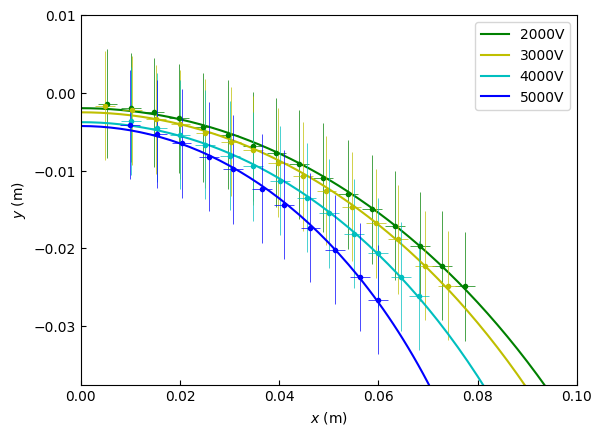

In [ ]:
lista = [[x2kV,y2kV,2000],[x3kV,y3kV,3000],[x4kV,y4kV,4000],[x5kV,y5kV,5000]]

u = np.arange(0, 0.2, 0.001)

fig = plt.figure()
ax= fig.add_subplot()
ax.tick_params(direction='in')
ax.set_ylim(-0.0375,0.01)
ax.set_xlim(0,0.1)

colors= ['g','y','c','b','m','r','#ff870c','#ffd645']
num = 0

for v in lista:

  def func(x, R, B):
    return  -R + np.sqrt(R**2-x**2) - B

  color = colors[num]

  curve = fl.curveFit(func, v[0]/100, v[1]/100, graf=True)

  ax.errorbar(v[0]/100,
                v[1]/100,
                xerr = 0.002,
                yerr = 0.007,
                capsize = 0,
                elinewidth = 0.5,
                linewidth = 0,
                marker = 'o',
                markersize = 3,
                markerfacecolor = color,
                markeredgecolor = color,
                ecolor = color,
                )
  plt.plot(u, func(u, curve[0][0],curve[0][1]),label = str(v[2])+'V', c=color)
  print('I = '+ str(v[2]) + ' mA, R = ' + str(curve[0][0]) + ' b = ' + str(curve[0][1]) + ' R$^2$ = ' + str(curve[2]) )

  print(curve)
  num += 1

plt.xlabel('$x$ (m)')
plt.ylabel('$y$ (m)')

plt.legend()

In [ ]:
xM100 = np.array([1.0086212112841317, 1.5, 1.9913787887158683, 2.5086205535780524, 2.999999342293921, 3.4913781310097893, 4.034481556606131, 9.103444340965355, 8.620686105827538, 8.120686434680579, 7.594824773946421, 7.103445327524473, 6.663790517982999, 6.077583666790315, 5.612067196514684, 5.051722663762237, 4.551722663762236])
yM100 = np.array([-0.18644075467647972, -0.21186442047794282, -0.22033919126473064, -0.3050849594559078, -0.3135594069632454, -0.34745784355149634, -0.42372884095588564, -1.432204258301574, -1.2796612936544447, -1.1694918596618045, -1.0084754173456882, -0.9406782208897363, -0.8644069002058967, -0.7033901346103303, -0.652542479727954, -0.5677967115367768, -0.48305094334559967])

xM200 = np.array([1.0406504468472582, 1.520325223423629, 1.9512202081152028, 2.463415466224699, 2.9105703815445385, 3.4471567761496207, 3.902441656783593, 4.357726537417566, 4.886182346431921, 5.333337261751761, 5.861793070766116, 6.398378845094605, 6.821143864472046, 7.357729638800534, 7.788624313353811, 8.219518987907087, 8.707324350074185])
yM200 = np.array([-0.2857143343711353, -0.3660712673956144, -0.4107141214974184, -0.4642857507783515, -0.5892855379046347, -0.7142856656288648, -0.8571426625154589, -0.955357145898196, -1.1517857720657232, -1.3124999787126284, -1.4910713951198447, -1.7053568904497358, -1.946428370719067, -2.1607142066469054, -2.4107144620953656, -2.660714036347932, -2.928571160958756])

xM300 = np.array([1.0088487568799658, 1.5663717531152268, 2.0177002144334795, 2.566373103452001, 3.0353997536985724, 3.575223885837128, 4.1681446102658, 4.663720231825818, 5.194694256747633, 5.716818849621096, 6.256642306591264, 6.814165302826526, 7.309740924386542])
yM300 = np.array([-0.25, -0.35833326975504554, -0.4666668574015299, -0.6000000635782877, -0.7333332697550455, -0.8833335240681965, -1.1000006993611653, -1.2833334604899087, -1.5, -1.75, -2.0666669209798174, -2.375, -2.6666666666666665])

xM400 = np.array([0.9818184592507102, 1.5363644686612217, 2.027273004705256, 2.5545460094105117, 3.1181820956143467, 3.654545870694247, 4.181818875399503, 4.736364191228693, 5.300000277432528, 5.845454822887074, 6.400000138716265])
yM400 = np.array([-0.3223142163381298, -0.4380165211091502, -0.5702481319015291, -0.7355374089437954, -0.9421490052466281, -1.1404959485387818, -1.4132235078699422, -1.6776864141904235, -2.04132294978912, -2.404958854859263, -2.8512400289790927])

xM500 = np.array([0.9913038170855978, 1.4869557256283967, 2.0260858950407608, 2.486956389054008, 3.034782077955163, 3.5652167278787363, 4.104347560716712, 4.599999469259511, 5.121738599694293])
yM500 = np.array([-0.4396549541233416, -0.5948272715284535, -0.8017245716769964, -0.9999996711468523, -1.2672411950391844, -1.586206386262357, -1.9482753461097164, -2.405172070765251, -2.931033904430671])

xM600 = np.array([1.0350872026876898, 1.5, 2.02631607126126, 2.57894821378378, 3.0877200144557024, 3.60526428504504, 4.1315803563063, 4.65789642756756])
yM600 = np.array([-0.5, -0.6833333969116211, -0.9083334604899088, -1.2333332697550454, -1.5499998728434243, -1.9499998092651367, -2.4833332697550454, -3.058333396911621])

xM700 = np.array([0.9823011598026891, 1.4601765968048375, 2.0088487449311803, 2.5309726327615563, 3.017698165029836, 3.460175921637362, 3.7610609311639753])
yM700 = np.array([-0.5652173913043478, -0.7913042151409646, -1.078260670537534, -1.4782608695652173, -1.8695652173913042, -2.3565216064453125, -2.730434915293818])

xM800 = np.array([1.0265476209766715, 1.5132738104883359, 2.061948049843631, 2.513275835993497, 3.079647589108724])
yM800 = np.array([-0.6637168589713077, -0.9469027863158359, -1.3362831410286922, -1.7168144102393232, -2.353982324784697])

<ipython-input-18-5db2b3b8d007>:18: RuntimeWarning: invalid value encountered in sqrt
  return  -R + np.sqrt(R**2-x**2) -B


a_0 = 0.3400947596712012 \pm 0.003492596351919035
a_1 = 0.001798874837199256 \pm 6.454966512484197e-05
R^2 = 0.9983074262224477
a_0 = 0.15524840490246172 \pm 0.0014710637124332783
a_1 = 0.003164046319085453 \pm 0.00014171991568466107
R^2 = 0.998102039608838
a_0 = 0.12242227284580777 \pm 0.0018962088373391875
a_1 = 0.0031495627406764397 \pm 0.0002178757738871717
R^2 = 0.9960414924443284
a_0 = 0.09328286592213966 \pm 0.0013085786946894743
a_1 = 0.0036019239431664936 \pm 0.00022332621227605476
R^2 = 0.9967938735445808
a_0 = 0.06466934866102526 \pm 0.0009333958983164211
a_1 = 0.0046269156189857365 \pm 0.0002675915769529402
R^2 = 0.996257884977862
a_0 = 0.054549996117711046 \pm 0.0010146352714086202
a_1 = 0.00523839038417043 \pm 0.0004111054980594811
R^2 = 0.9927045094374736
a_0 = 0.042850948969171514 \pm 0.0008244887281215708
a_1 = 0.005628184501735684 \pm 0.00043078525355225443
R^2 = 0.9921470148504536
a_0 = 0.035497994837132986 \pm 0.0010378755681399586
a_1 = 0.00607962470508929 \pm 0.00

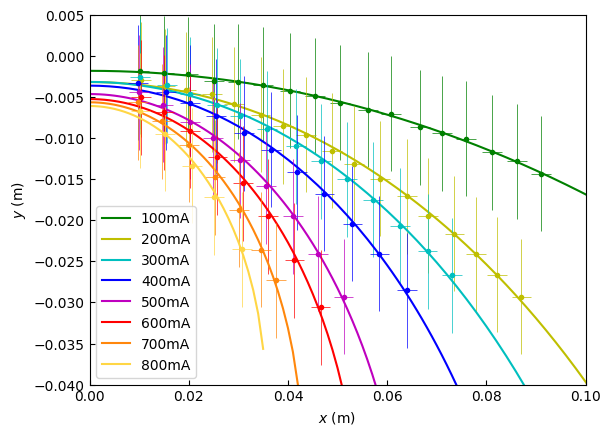

In [ ]:
lista = [[xM100,yM100,100],[xM200,yM200,200],[xM300,yM300,300],
 [xM400,yM400,400],[xM500,yM500,500],[xM600,yM600,600],[xM700,yM700,700],[xM800,yM800,800]]

u = np.arange(0, 0.2, 0.001)

fig = plt.figure()
ax= fig.add_subplot()
ax.tick_params(direction='in')
ax.set_ylim(-0.04,0.005)
ax.set_xlim(0,0.1)

colors= ['g','y','c','b','m','r','#ff870c','#ffd645']
num = 0

for v in lista:

  def func(x, R,B):
    return  -R + np.sqrt(R**2-x**2) -B

  color = colors[num]

  curve = fl.curveFit(func, v[0]/100, v[1]/100, graf=True)

  ax.errorbar(v[0]/100,
                v[1]/100,
                xerr = 0.002,
                yerr = 0.007,
                capsize = 0,
                elinewidth = 0.5,
                linewidth = 0,
                marker = 'o',
                markersize = 3,
                markerfacecolor = color,
                markeredgecolor = color,
                ecolor = color,
                )
  plt.plot(u, func(u, curve[0][0], curve[0][1]),label = str(v[2])+'mA', c=color)
  #print('I = '+ str(v[2]) + ' mA, R = ' + str(curve[0][0]) + ' b = ' + str(curve[0][1]) )
  curve = fl.curveFit(func, v[0]/100, v[1]/100)
  num += 1

plt.xlabel('$x$ (m)')
plt.ylabel('$y$ (m)')

plt.legend()

##Desviació EM


In [ ]:
xVp = np.array([0.5, 1, 1.5, 1.9795918367346939, 2.4591836734693877, 3, 3.520408163265306, 3.9999999999999996, 4.520408163265306, 5.0102040816326525, 5.540816326530612, 6.030612244897958, 6.530612244897958, 7.030612244897958, 7.561224489795918, 8.03061224489796, 8.46938775510204, 9.020408163265305])
yVp = np.array([-0.09, -0.12, -0.13, -0.16, -0.16, -0.19, -0.21, -0.2, -0.21, -0.2, -0.18, -0.18, -0.13, -0.12, -0.1, -0.05, -0.01, 0.07])

xMag = np.array([0.5643564356435644, 0.9801980198019802, 1.504950495049505, 1.99009900990099, 2.504950495049505, 2.9603960396039604, 3.4752475247524752, 3.98019801980198, 4.455445544554456, 4.9405940594059405, 5.396039603960396, 5.871287128712871, 6.356435643564357, 6.8316831683168315, 7.297029702970297, 7.782178217821782, 8.247524752475247, 8.673267326732674])
yMag = np.array([-0.11111111111111112, -0.13131313131313133, -0.15151515151515152, -0.21212121212121213, -0.23232323232323235, -0.27272727272727276, -0.32323232323232326, -0.38383838383838387, -0.4646464646464647, -0.5353535353535354, -0.595959595959596, -0.6767676767676768, -0.7777777777777778, -0.8787878787878789, -0.9494949494949496, -1.0707070707070707, -1.1818181818181819, -1.292929292929293])


a_0 = -0.32679768431275535 \pm 0.0033772707320929114
a_1 = -0.001370055429405999 \pm 6.036802595551406e-05
R^2 = 0.9981772249462723


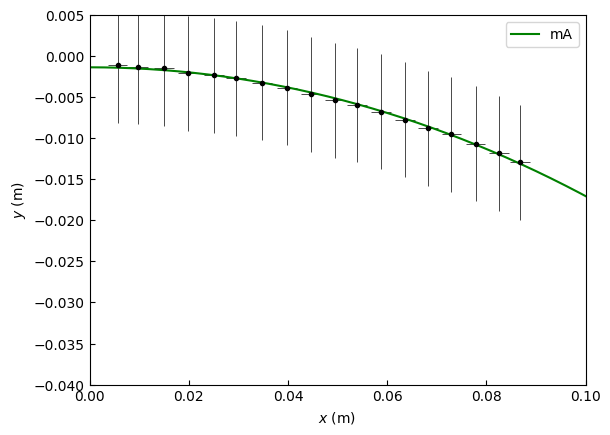

In [ ]:

u = np.arange(0, 0.2, 0.001)

fig = plt.figure()
ax= fig.add_subplot()
ax.tick_params(direction='in')
ax.set_ylim(-0.04,0.005)
ax.set_xlim(0,0.1)


def func(x, R,B):
  return  R + np.sqrt(R**2-x**2) +B

curve = fl.curveFit(func, xMag/100, yMag/100, graf=True)

ax.errorbar(xMag/100,
              yMag/100,
              xerr = 0.002,
              yerr = 0.007,
              capsize = 0,
              elinewidth = 0.5,
              linewidth = 0,
              marker = 'o',
              markersize = 3,
              markerfacecolor = 'k',
              markeredgecolor = 'k',
              ecolor = 'k'
              )
plt.plot(u, func(u, curve[0][0], curve[0][1]),label = 'mA', c='g')
#print('I = '+ str(v[2]) + ' mA, R = ' + str(curve[0][0]) + ' b = ' + str(curve[0][1]) )
curve = fl.curveFit(func, xMag/100, yMag/100)

plt.xlabel('$x$ (m)')
plt.ylabel('$y$ (m)')

plt.legend()

In [ ]:
k = fl.Variable('k',0.937,0.037)
Vp = fl.Variable('Vp',1000, 200)
I = fl.Variable('I',0.1, 0.01)
R = fl.Variable('R',0.3268, 0.0034)
d = fl.Variable('d',0.054,0.001)
K = fl.Variable('K', 0.0042314178, 0)

qm = (k.sim*Vp.sim)/(d.sim*K.sim**2*I.sim**2*R.sim)


fl.propIncertesa(qm,[k,Vp,I,R,d,K])

⎛      _______________________________________________________________________
⎜     ╱     2   2       2  2    2      2     2      2  2    2       2  2    2 
⎜    ╱    Vp ⋅σₖ      Vp ⋅k ⋅σ_d      k ⋅σ_Vp     Vp ⋅k ⋅σ_R    4⋅Vp ⋅k ⋅σ_K  
⎜   ╱   ─────────── + ─────────── + ─────────── + ─────────── + ───────────── 
⎜  ╱     4  4  2  2    4  4  2  4    4  4  2  2    4  4  4  2     4  6  2  2  
⎝╲╱     I ⋅K ⋅R ⋅d    I ⋅K ⋅R ⋅d    I ⋅K ⋅R ⋅d    I ⋅K ⋅R ⋅d     I ⋅K ⋅R ⋅d   

________________                  ⎞
      2  2    2                   ⎟
  4⋅Vp ⋅k ⋅σ_I                    ⎟
+ ───────────── , 84923245553.0475⎟
    6  4  2  2                    ⎟
   I ⋅K ⋅R ⋅d                     ⎠